K-means algorithm                                             Nicole Stafford

In [45]:
# imports needed functions/ methods
import math as m
from math import *

import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

import statistics as stats

import cv2

from skimage import io, color

from skimage import exposure

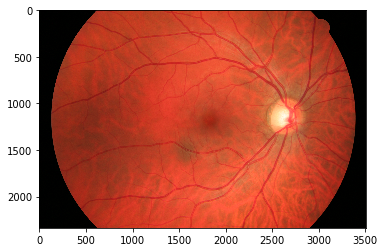

In [46]:
# downloads image to process 
#image = io.imread('Pictures\Halloween.jpg')
image = io.imread('Pictures\eye.jpg') 
plt.imshow(image)
# gets dimensions of picture to appropriatly prealocate arrays
height = image.shape[0]
width = image.shape[1]

#used for testing and running code on part of an image
image = image1##image1[800:1200,2300:2750]
plt.imshow(image)
height = image.shape[0]
width = image.shape[1]
print(image.size)

In [47]:
# number of cluster for the image to be decomposed into 
k = 4
N = int(image.size/3) # this is the number of individual pixels (each of which contrains 3 numbers)

# number of dimensions for the data to be clustered together
d = 3

data = np.array(image)

# this is where you specify your starting centroid positions, must choose values that actually lead 
# to clusters since I wasn't able to add in a statment to fix that bug
#centroids = np.array([[255, 0, 0], [5, 7, 8], [50, 74, 50], [238,137,22], [250,92,72]])
centroids = np.array([[255, 0, 0], [250, 250, 250], [50, 74, 50],[255, 100, 40]])

centroids = centroids.flatten()
# make an array for each cluster the size of the number of data points
cen_vect = np.empty((N,d*k),int)
cen_vect[: :] = centroids
# flattens image to be able to manipulate it with matricies 
datatest = image.flatten()
data = datatest.reshape(N,d)

In [48]:
# prealocates way to track if data points change cluster groups
prev_location = np.empty((1,N))
curr_location = np.empty((1,N))

count = 0
while (True):
    
    centroids = centroids.flatten()
    # make an array for each cluster the size of the number of data points
    cen_vect = np.empty((N,d*k),int)
    cen_vect[: :] = centroids
    
    prev_location = curr_location
    clusterdist = np.empty((k,N))
    for i in range (0,k):
        #calculated distance between centroid of cluster i and all data points
        diff = data - cen_vect[:,col:col+3]
        trans = diff.transpose()
        square = np.square(trans)
        distance = square.transpose()      
        dis = np.sum(distance, axis=1)
        distance = np.sqrt(dis)
       # print('distance',distance)
        clusterdist[i,:] = distance
       # print('cluster distance', clusterdist, 'dimensions', clusterdist.shape)
    
    # now want to find the minium distance from the data point to each centroid and store it in matrix
    #cluster_dist.reshape(N,k)
    #print(clusterdist, clusterdist.shape)
    curr_location = clusterdist.argmin(axis =0)
    #print("cluster location", curr_location)
    #print('previous location', prev_location)
    if np.array_equal(prev_location, curr_location):
        break
    #print("curr location size",curr_location.size, 'prev size', prev_location.size)
    
    # calculate new centroids

    # for calculating new centroids
    test = np.reshape(curr_location, (N,1))
    #print(test)
    number = np.arange(N)
    number = np.reshape(number, (N,1))

    combine = np.hstack((test,data,number))
    #print('combine',combine)
    sort = combine[np.argsort(combine[:,0])]
    combinetest = sort
    
    averages = []
    # This loop replaces pixels in the current cluster with the average value
    for i in range (0,k):
       # if curr_location.includes(k):
        index = np.where(sort[:,0]==i)
        
        #print('index',index)
        index1 = index[0]
            #print('lengt', len(index1))
            #print(index)
        start = index1[0]
            #print('start',start)
        end = index1[len(index1)-1]
            #print('end',end)
        insert = np.empty((end- start +1 +1,d))
            #print(sort[start:end,1:d+1])
        mean = np.mean(sort[start:end,1:d+1], axis=0)
        #print('mean',mean)
        insert = np.empty((end-start+1,d))
        insert[:,:] = mean
            #print('insert',insert)
        combinetest[start:end+1, 1:d+1] = insert
        averages = np.concatenate((averages, mean), axis = 0)

            # assignes new calculated averages to start process again
        centroids = averages
    centroids = averages
    count = count + 1
    
print('number of itterations', count)
        
    
    
    

IndexError: index 0 is out of bounds for axis 0 with size 0

I am not sure why I am getting an error now. I was using it before with the same clusters to produce the images below and how I am getting an error and did not have time to figure out what it was. 

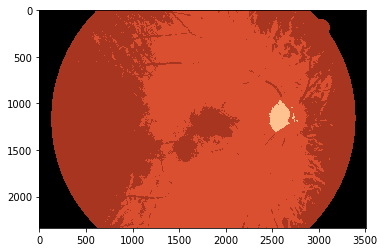

In [18]:
# for plotting return pixels back to positions with values changed 
# sorts all the newly assigned pixel values by the number assigned to keep track of where each pixel was in the original image
# This way they can be combined into their orignial image order
newpixelval = combinetest[np.argsort(combinetest[:,4])]
# strips out the pixel number and cluster numbers used to keep track of individual pionts
pixels = newpixelval[:, 1:4]
# reshapes into the correct image dimensions
newPixels = np.reshape(pixels, (height,width,3))

plt.imshow(newPixels)

Example segmentations

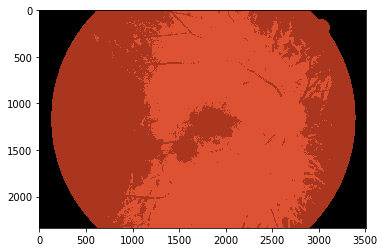

In [14]:
# this segmentation isn't the best since there isn't enough clusters to distinguish the center of the eye
# this was with 3 clusters
# cluster centroids were
# centroids = np.array([[255, 0, 0], [250, 250, 250], [50, 74, 50])
test1 = newPixels
plt.imshow(test1)

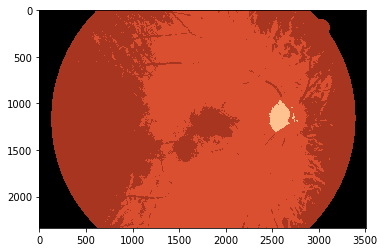

In [19]:
# this is with 4 clusters and can start to see center of eye
# centroids for calculation
#centroids = np.array([[255, 0, 0], [250, 250, 250], [50, 74, 50],[255, 100, 40]])
test2 = newPixels
plt.imshow(test2)

In [ ]:
# (Slower way for plotting the image with the new pixel values) foudn that I could reshape the images
# which was must faster since it avoided double forloops
newpixelval = combinetest[np.argsort(combinetest[:,4])]
#print(newpixelval)
pixels = newpixelval[:, 1:4]

#test_pixels = np.reshape(pixels,(d*width,d*height))

#plt.imshow(test_pixels)
print(pixels)
pixel_loc = 0;
image2 = image
print(pixels[pixel_loc,0])
for i in range (0,height):
    for j in range (0, width):
        image2[i][j] = pixels[pixel_loc,0], pixels[pixel_loc,1],pixels[pixel_loc,2]
        pixel_loc = pixel_loc +1
                
plt.imshow(image2)

Also another way to make my algorithm run faster is remove the second forloop and figure out a way 
replace all the values I need to with some matrix indexing. It also might solve my error problem and 
make the algorthim more robust

In [ ]:
# if you only want to take a part of an image for analysis 
image = image1[0:500,200:850]
plt.imshow(image)
#print(image)
height = image.shape[0]
width = image.shape[1]
#print(height, width)
    

Calculating DICE coefficient I would turn one of the well segmented images into a binary image I would proablby seperate and try to segment using the whitish circle in the center then take the difference from the pre processed binary images from the repository 

DICE is calculated by 2* probability that the pixel is classified correctly in by my segmentation and the ground truth from the repository divided by the probablity my segmentation clasified the pixel plus the proablity the ground truth clasiffied the pixel correctly

since it is binary I would assigned 1s as the pixels for the whitish circle and 0 to all the other background when I would subtract the binary of my segmentation and the ground truth the number of zeros would be the pixels that were both classified the same between the two images. Since I am subtracting the ground image from my segmentation the values that are 1 would be the pixels that the ground truth identified, but my segmentation did not and the values that were -1 would be the pixels my segmentation identified, but the ground truth did not. To get probabilities of everything it would be the number of 0s, 1s, -1s respectivlty divided by the number of total pixels